In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
pickleFileCut = './CutflowforMonojet_DM_spin-1mediator_DF.pcl'
dfCut = pd.read_pickle(pickleFileCut)
pickleFileYield = './Signaltemplates_DMsimp_spin-1_Monojet_DF.pcl'
dfYield = pd.read_pickle(pickleFileYield)

In [3]:
dfVectorMonoJCut = dfCut[(dfCut['Coupling'] == 'Axial') 
                         & (dfCut['Mode'] == '$\\chi\\chi+j$') 
                         & (dfCut['Data-takingperiod'] == 2017)]
dfVectorMonoJYield = dfYield[(dfYield['Coupling'] == 'Axial') 
                             & (dfYield['Mode'] == 'DM+QCDjets') 
                             & (dfYield['Data-takingperiod'] == 2017)]

In [4]:
print(len(dfVectorMonoJCut),len(dfVectorMonoJYield))

43 43


In [5]:
binCols = [c for c in dfVectorMonoJYield.columns if 'bin_' in c]
# Add total yield column
dfVectorMonoJYield['TotalYield(pre)'] = dfVectorMonoJYield[binCols].sum(axis=1)

In [6]:
# Add cutflow
df = dfVectorMonoJYield.merge(dfVectorMonoJCut,how='outer',on=['$m_{med}$','$m_{DM}$'])

In [7]:
df['Efficiency(pre)'] = df[df.columns[-1]] #Last column = efficiency for the pre-selection

In [8]:
# Compute total signal yield = sum(bins)/(pre-cut eff)
df['TotalYield'] = df['TotalYield(pre)']/df["Efficiency(pre)"]  

In [9]:
# Compute total cross-section
lum2017 = 41.5 #fb^-1
df['TotalXSec(fb)'] = df['TotalYield']/lum2017

In [10]:
df[df.columns[:4].to_list()+['Efficiency(pre)','TotalYield(pre)','TotalYield','TotalXSec(fb)']]

,Coupling_x,Mode_x,$m_{med}$,$m_{DM}$,Efficiency(pre),TotalYield(pre),TotalYield,TotalXSec(fb)
0,Axial,DM+QCDjets,100.0,1.0,0.13955,967227.491000,6.931046e+06,167013.160373
1,Axial,DM+QCDjets,100.0,30.0,0.13988,683023.284000,4.882923e+06,117660.797723
2,Axial,DM+QCDjets,100.0,40.0,0.14075,374885.725000,2.663487e+06,64180.397612
3,Axial,DM+QCDjets,100.0,45.0,0.14382,192796.164000,1.340538e+06,32302.118612
4,Axial,DM+QCDjets,100.0,55.0,0.18570,25153.813100,1.354540e+05,3263.952495
5,Axial,DM+QCDjets,100.0,60.0,0.19495,18848.399300,9.668325e+04,2329.716832
6,Axial,DM+QCDjets,100.0,70.0,0.21279,12633.341600,5.937000e+04,1430.602330
7,Axial,DM+QCDjets,100.0,100.0,0.24908,5515.200200,2.214228e+04,533.549022
8,Axial,DM+QCDjets,100.0,150.0,0.29305,2057.086200,7.019574e+03,169.146365
9,Axial,DM+QCDjets,100.0,200.0,0.32490,933.210210,2.872300e+03,69.212044


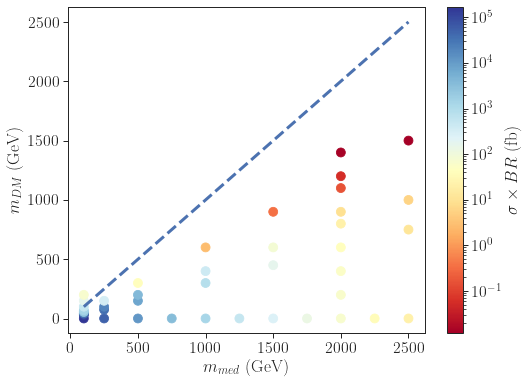

In [11]:
plt.figure(figsize=(8,6))
p =plt.scatter(df['$m_{med}$'], df['$m_{DM}$'], c=df['TotalXSec(fb)'],
               s=80,cmap=cm,
               norm=LogNorm(vmin=df['TotalXSec(fb)'].min(),vmax=df['TotalXSec(fb)'].max()))
x = np.linspace(df['$m_{med}$'].min(),df['$m_{med}$'].max(),100)
plt.plot(x,x,linestyle='--',linewidth=3)
plt.colorbar(label=r'$\sigma \times BR$ (fb)')
plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$m_{DM}$ (GeV)')
plt.show()

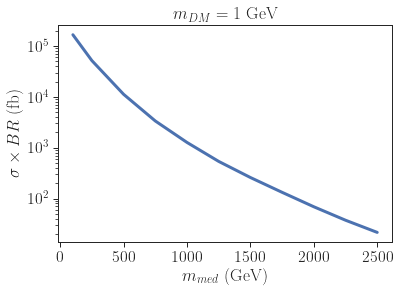

In [12]:
# Plot cross-sections for mDM = 1.0 only
df0 = df[df['$m_{DM}$'] == 1.0]
plt.plot(df0['$m_{med}$'], df0['TotalXSec(fb)'],linewidth=3)
plt.xlabel(r'$m_{med}$ (GeV)')
plt.ylabel(r'$\sigma \times BR$ (fb)')
plt.yscale('log')
plt.title(r'$m_{DM} = 1$ GeV')
plt.show()

In [27]:
dfModel = dfYield[(dfYield['Coupling'] == 'Axial') 
                   & (dfYield['Mode'] == 'DM+QCDjets') 
                   & (dfYield['Data-takingperiod'] == 2017)
                   & (dfYield["$m_{med}$"] == 2000.) 
                   & (dfYield["$m_{DM}$"] == 1.0)
                 ]
dfModel

,Coupling,Mode,$m_{med}$,$m_{DM}$,$g_{q}$,$g_{DM}$,Data-takingperiod,bin_250.0_280.0,bin_280.0_310.0,bin_310.0_340.0,...,bin_690.0_740.0,bin_740.0_790.0,bin_790.0_840.0,bin_840.0_900.0,bin_900.0_960.0,bin_960.0_1020.0,bin_1020.0_1090.0,bin_1090.0_1160.0,bin_1160.0_1250.0,bin_1250.0_1400.0
281,Axial,DM+QCDjets,2000.0,1.0,0.25,1.0,2017,206.54,156.78,126.81,...,17.966,14.651,10.769,9.8467,7.9111,6.1055,4.4425,3.1408,3.0281,5.9266
